### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load datasets

In [2]:
# Load race_results
race_results = pd.read_csv('./data/race_results_20240101_20240131.csv')

# Load race_details
race_details = pd.read_csv('./data/race_details_20240101_20240131.csv')

### Display race details

In [3]:
race_details.head(10)

,race_date,race_city,race_no,race_type,race_sex_group,race_age_group,race_race_group,race_length,race_track_type,race_track_condition,best_rating
0,2024-01-01,Bursa,1,Condition 2,Undefined,3 Years Old,English,1400,Dirt,Good Going,1.24.50
1,2024-01-01,Bursa,2,Maiden,Undefined,4 Years Old,Arabian,1400,Dirt,Good Going,1.33.63
2,2024-01-01,Bursa,3,Condition 3,Female,3 Years Old,English,1200,Dirt,Good Going,1.11.37
3,2024-01-01,Bursa,4,Condition 4,Undefined,4 Years Old and Up,Arabian,2000,Dirt,Good Going,2.18.40
4,2024-01-01,Bursa,5,Handicap 15,Undefined,4 Years Old and Up,English,1300,Dirt,Good Going,1.18.11
5,2024-01-01,Bursa,6,Condition 3,Undefined,4 Years Old and Up,English,1400,Dirt,Good Going,1.24.50
6,2024-01-01,Bursa,7,Maiden,Undefined,4 Years Old,Arabian,1400,Dirt,Good Going,1.33.63
7,2024-01-01,Bursa,8,Condition-6,Female,4 Years Old and Up,English,1300,Dirt,Good Going,1.18.11
8,2024-01-01,Bursa,9,Handicap 14,Female,4 Years Old and Up,Arabian,1800,Dirt,Good Going,2.03.83
9,2024-01-02,Adana,1,Condition 5,Female,4 Years Old,Arabian,1400,Dirt,Good Going,1.34.68


In [4]:
print(f"Race Details Shape: {race_details.shape}")

Race Details Shape: (480, 11)


In [5]:
# Race Details Info
print("\nRace Details Info:")
print(race_details.info())


Race Details Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   race_date             480 non-null    object
 1   race_city             480 non-null    object
 2   race_no               480 non-null    int64 
 3   race_type             480 non-null    object
 4   race_sex_group        480 non-null    object
 5   race_age_group        480 non-null    object
 6   race_race_group       480 non-null    object
 7   race_length           480 non-null    int64 
 8   race_track_type       480 non-null    object
 9   race_track_condition  480 non-null    object
 10  best_rating           480 non-null    object
dtypes: int64(2), object(9)
memory usage: 41.4+ KB
None


In [6]:
# Convert 'race_date' to datetime
race_details['race_date'] = pd.to_datetime(race_details['race_date'], format='%Y-%m-%d')
print("\nAfter converting 'race_date' to datetime:")
print(race_details.info())


After converting 'race_date' to datetime:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   race_date             480 non-null    datetime64[ns]
 1   race_city             480 non-null    object        
 2   race_no               480 non-null    int64         
 3   race_type             480 non-null    object        
 4   race_sex_group        480 non-null    object        
 5   race_age_group        480 non-null    object        
 6   race_race_group       480 non-null    object        
 7   race_length           480 non-null    int64         
 8   race_track_type       480 non-null    object        
 9   race_track_condition  480 non-null    object        
 10  best_rating           480 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 41.4+ KB
None


### Convert Time Strings to Seconds

In [7]:
def time_to_seconds(time_str):
    try:
        minutes, seconds, hundredths = map(int, time_str.split('.'))
        total_seconds = minutes * 60 + seconds + hundredths / 100
        return total_seconds
    except:
        return np.nan  # In case of unexpected format

# Apply the conversion
race_details['best_rating_seconds'] = race_details['best_rating'].apply(time_to_seconds)

# Check for any NaN values introduced due to parsing errors
print("\nNumber of NaN values in 'best_rating_seconds':", race_details['best_rating_seconds'].isnull().sum())

print("\nSample of converted 'best_rating_seconds':")
print(race_details[['best_rating', 'best_rating_seconds']].head(10))
print('')
print(race_details.info())


Number of NaN values in 'best_rating_seconds': 0

Sample of converted 'best_rating_seconds':
  best_rating  best_rating_seconds
0     1.24.50                84.50
1     1.33.63                93.63
2     1.11.37                71.37
3     2.18.40               138.40
4     1.18.11                78.11
5     1.24.50                84.50
6     1.33.63                93.63
7     1.18.11                78.11
8     2.03.83               123.83
9     1.34.68                94.68

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   race_date             480 non-null    datetime64[ns]
 1   race_city             480 non-null    object        
 2   race_no               480 non-null    int64         
 3   race_type             480 non-null    object        
 4   race_sex_group        480 non-null    object        
 5   race

In [8]:
# List of categorical columns to standardize
categorical_cols = [
    'race_city',
    'race_type',
    'race_sex_group',
    'race_age_group',
    'race_race_group',
    'race_track_type',
    'race_track_condition'
]

# Apply standardization
for col in categorical_cols:
    race_details[col] = race_details[col].str.strip().str.lower()

print("\nSample of standardized categorical columns:")
print(race_details[categorical_cols].head(10))


Sample of standardized categorical columns:
  race_city    race_type race_sex_group      race_age_group race_race_group  \
0     bursa  condition 2      undefined         3 years old         english   
1     bursa       maiden      undefined         4 years old         arabian   
2     bursa  condition 3         female         3 years old         english   
3     bursa  condition 4      undefined  4 years old and up         arabian   
4     bursa  handicap 15      undefined  4 years old and up         english   
5     bursa  condition 3      undefined  4 years old and up         english   
6     bursa       maiden      undefined         4 years old         arabian   
7     bursa  condition-6         female  4 years old and up         english   
8     bursa  handicap 14         female  4 years old and up         arabian   
9     adana  condition 5         female         4 years old         arabian   

  race_track_type race_track_condition  
0            dirt           good going  
1  

<Figure size 1500x1000 with 0 Axes>

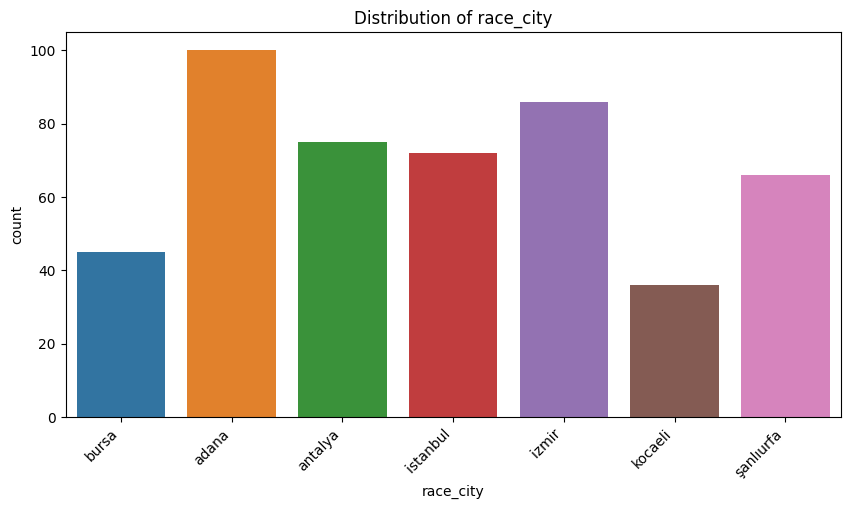

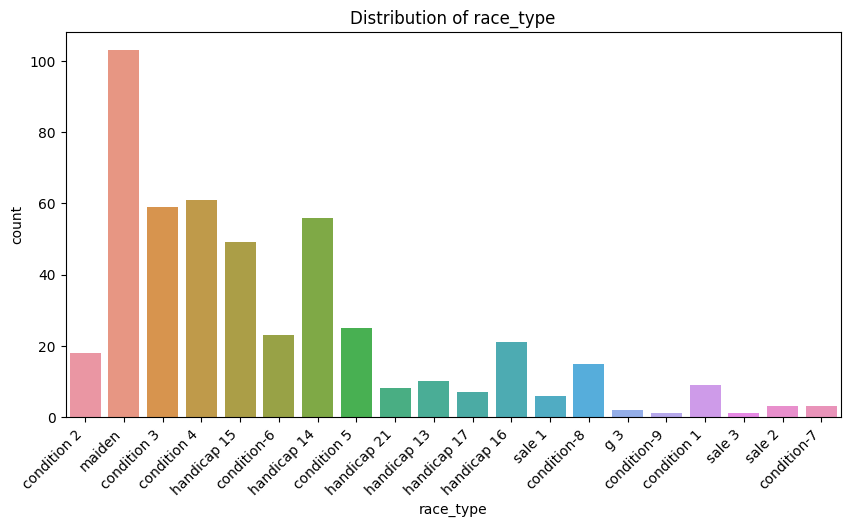

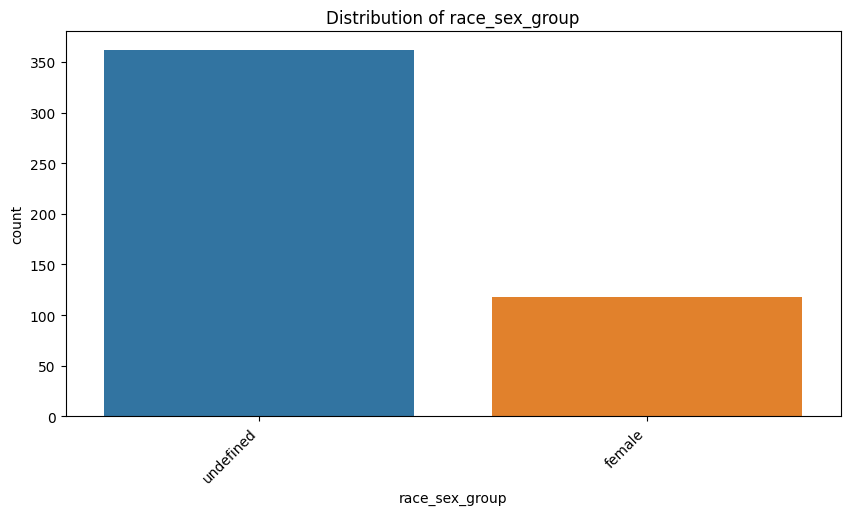

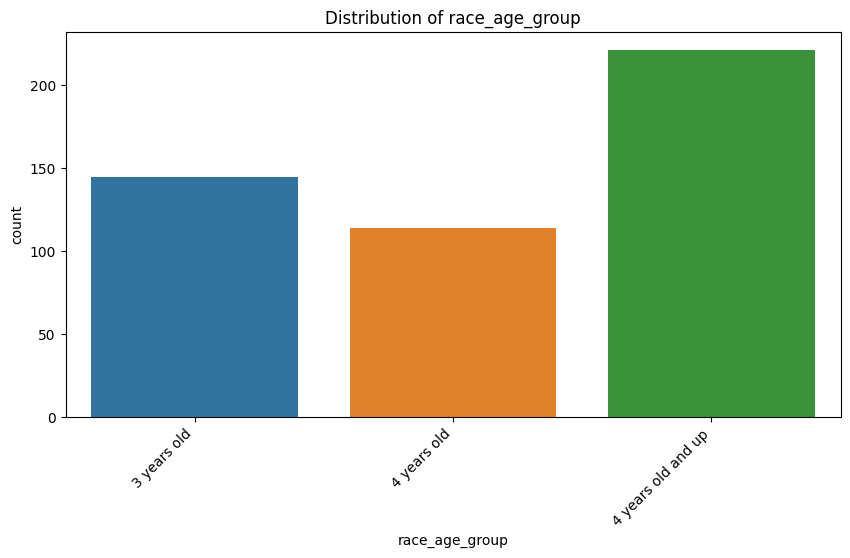

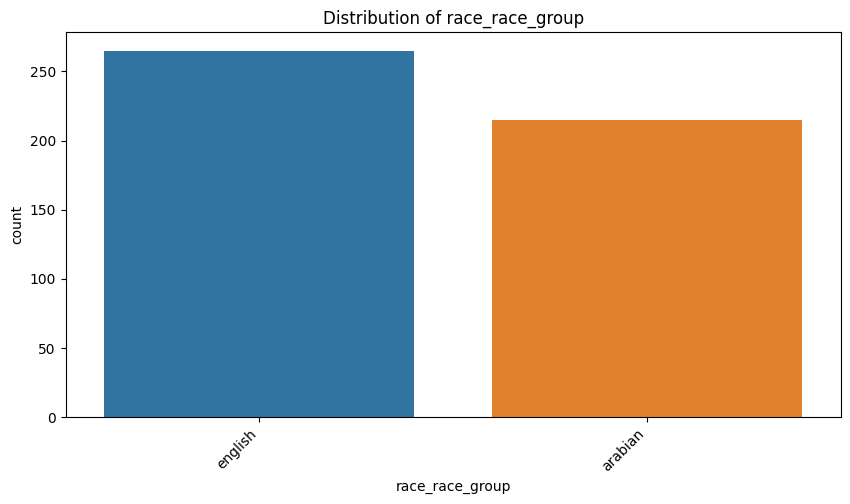

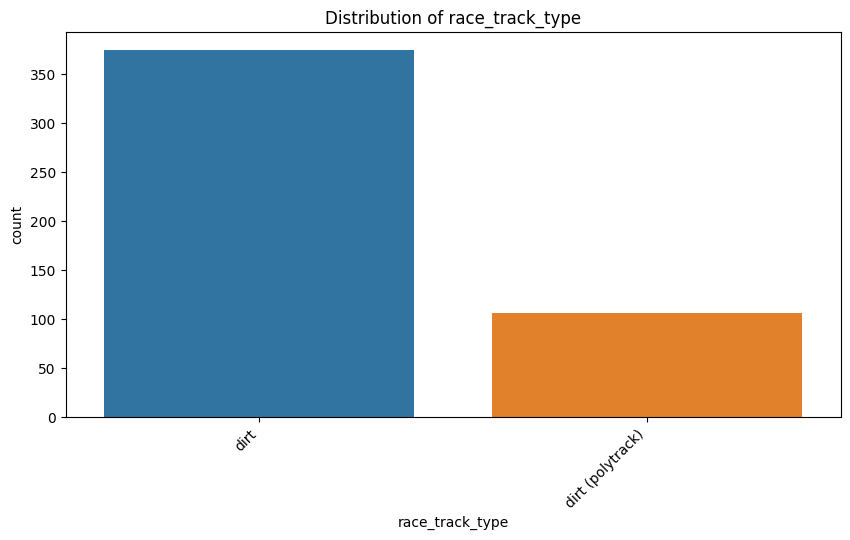

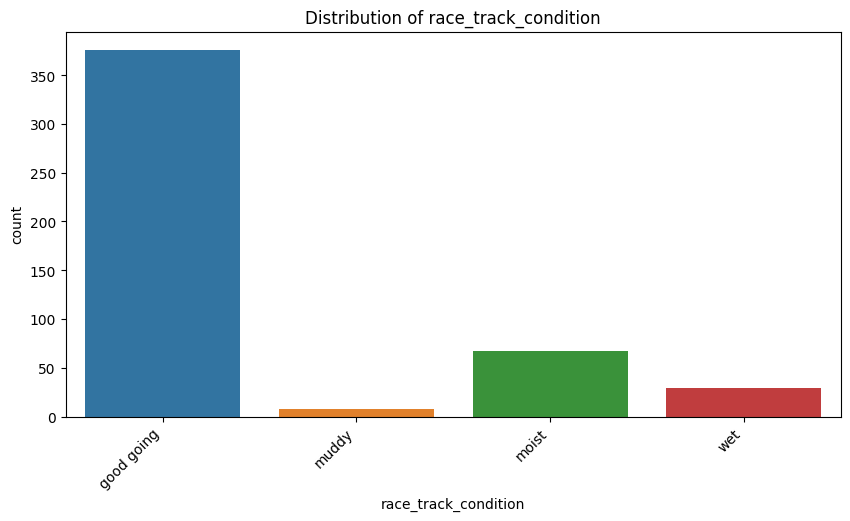

In [9]:
# Set a larger figure size
plt.figure(figsize=(15, 10))

# Loop over each categorical column and visualize its distribution
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=race_details, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha="right")
    plt.show()

In [10]:
# Numeric features in race_details
print("\nRace Details - Numeric Features Summary:")
print(race_details.describe())


Race Details - Numeric Features Summary:
                           race_date     race_no  race_length  \
count                            480  480.000000   480.000000   
mean   2024-01-16 12:51:00.000000256    4.570833  1553.125000   
min              2024-01-01 00:00:00    1.000000  1200.000000   
25%              2024-01-09 00:00:00    2.750000  1400.000000   
50%              2024-01-16 00:00:00    4.500000  1400.000000   
75%              2024-01-24 00:00:00    6.250000  1900.000000   
max              2024-01-31 00:00:00    9.000000  2200.000000   
std                              NaN    2.406321   292.549489   

       best_rating_seconds  
count           480.000000  
mean             99.609375  
min              69.930000  
25%              83.812500  
50%              93.640000  
75%             118.670000  
max             152.280000  
std              21.527170  


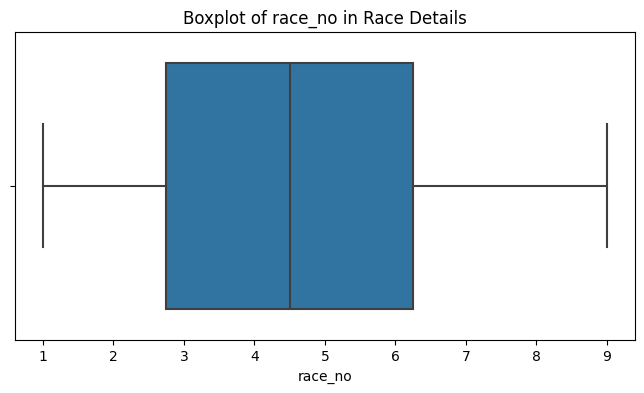

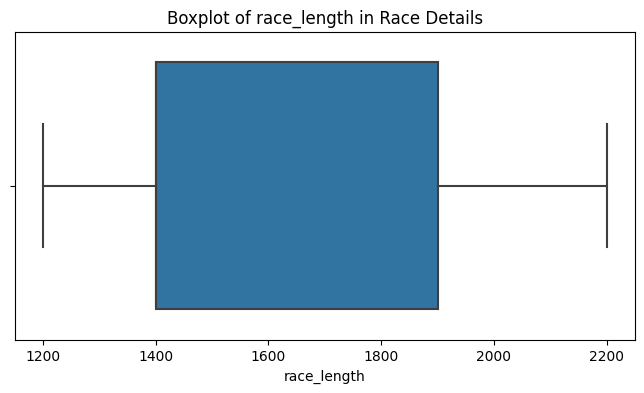

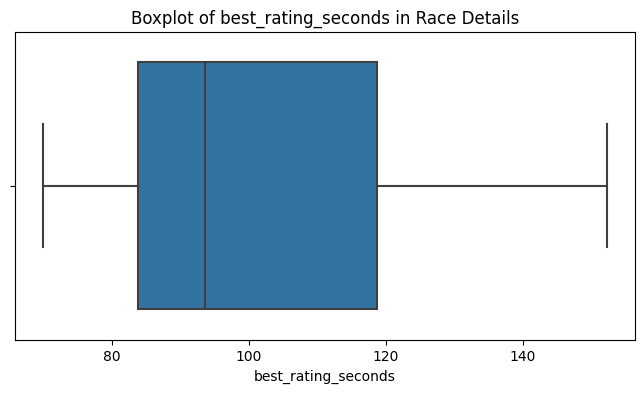

In [11]:
# Similarly for race_details
numeric_cols_details = race_details.select_dtypes(include=[np.number]).columns.tolist()

for col in numeric_cols_details:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=race_details[col])
    plt.title(f'Boxplot of {col} in Race Details')
    plt.show()

In [12]:
race_details.head(10)

,race_date,race_city,race_no,race_type,race_sex_group,race_age_group,race_race_group,race_length,race_track_type,race_track_condition,best_rating,best_rating_seconds
0,2024-01-01,bursa,1,condition 2,undefined,3 years old,english,1400,dirt,good going,1.24.50,84.50
1,2024-01-01,bursa,2,maiden,undefined,4 years old,arabian,1400,dirt,good going,1.33.63,93.63
2,2024-01-01,bursa,3,condition 3,female,3 years old,english,1200,dirt,good going,1.11.37,71.37
3,2024-01-01,bursa,4,condition 4,undefined,4 years old and up,arabian,2000,dirt,good going,2.18.40,138.40
4,2024-01-01,bursa,5,handicap 15,undefined,4 years old and up,english,1300,dirt,good going,1.18.11,78.11
5,2024-01-01,bursa,6,condition 3,undefined,4 years old and up,english,1400,dirt,good going,1.24.50,84.50
6,2024-01-01,bursa,7,maiden,undefined,4 years old,arabian,1400,dirt,good going,1.33.63,93.63
7,2024-01-01,bursa,8,condition-6,female,4 years old and up,english,1300,dirt,good going,1.18.11,78.11
8,2024-01-01,bursa,9,handicap 14,female,4 years old and up,arabian,1800,dirt,good going,2.03.83,123.83
9,2024-01-02,adana,1,condition 5,female,4 years old,arabian,1400,dirt,good going,1.34.68,94.68


In [13]:
# Save the cleaned data to a CSV file
race_details.to_csv('cleaned_race_details.csv', index=False)

# Now let's investigate the Race Results dataset

In [14]:
race_results.head(10)

,race_date,race_city,race_no,result,horse_name,horse_accessories,horse_age,horse_sex,horse_origin,horse_sire,...,horse_owner,horse_trainer,horse_race_degree,horse_win_value,horse_psf_rate,horse_psf_rank,Horse_starting_box_no,horse_margin,horse_late_start,horse_rate
0,2024-01-01,Bursa,1,1,MY REVERIE,KG K DB,3y,f,BLUEGRASS CAT (USA)- LEGALLY INCLUDED (USA) / ...,BLUEGRASS CAT (USA),...,NİMET ARİF KURTEL,TAMER TURAN,1.31.26,1.50,49,1,1,9 Lengths,NaN,42
1,2024-01-01,Bursa,1,2,NOBLE WOMAN,KG DB SK,3y,f,SCARFACE- PROVIDENCE / SRI PEKAN (USA),SCARFACE,...,AHMET KURT,TUNCAY PELEN,1.33.05,3.75,20,2,4,Half Lengths,NaN,43
2,2024-01-01,Bursa,1,3,ÇİSEM SULTAN,KG K DB SGKR,3y,f,SMART ROBIN (JPN)- SNOOZY TIMES / ROYAL ABJAR ...,SMART ROBIN (JPN),...,BÜLENT BAYBURAN,KAZIM ŞENGEL,1.33.17,28.70,3,6,3,3 Lengths,NaN,33
3,2024-01-01,Bursa,1,4,OKYANUS GÜZELİ,SKG SK,3y,f,SIDNEY'S CANDY (USA)- NURSENA / SCARFACE,SIDNEY'S CANDY (USA),...,DİLEK ÖKTEN,ALİ RIZA AYDIN,1.33.65,14.85,3,5,6,4 Lengths,NaN,39
4,2024-01-01,Bursa,1,5,MOUNTAIN LION,DB SK,3y,m,LION HEART (USA)- SAN MARINO / SRI PEKAN (USA),LION HEART (USA),...,SEMİH KATI,MURAT TÜRKOĞLU,1.34.30,4.55,17,3,5,NaN,NaN,51
5,2024-01-01,Bursa,1,6,KING UĞUR,KG DB SK,3y,m,PIANO SONATA- DOLPHINE / DOMINO EFFECT,PIANO SONATA,...,ALİ OSMAN ARSLAN,SEDAT KOÇAK,1.37.55,9.90,7,4,2,NaN,NaN,42
6,2024-01-01,Bursa,2,1,ÇELİK EFE,K DB,4y,m,JOKER- GÜLŞİRİN / SAĞANAK,JOKER,...,İBRAHİM ÇELİK,KADİR TURAN,1.42.45,6.35,16,3,5,3 Lengths,NaN,27
7,2024-01-01,Bursa,2,2,EYLÜLLİZE,KG K DB,4y,f,YAKUPBEY- AŞKANA / ODİNHAN,YAKUPBEY,...,İBRAHİM YÖNTEM,FERDİ KIRAN,1.43.00,17.50,3,7,7,3 Lengths,NaN,28
8,2024-01-01,Bursa,2,3,PARİS ÖZLEMİ,NaN,4y,f,SİLAH- PARİS / DEMİRKAZIK,SİLAH,...,MUHAMMET YAĞMURLU,EYLEM GÜN GÜNEŞ,1.43.56,21.95,2,6,8,"1,5 Lengths","1,5 Lengths",0
9,2024-01-01,Bursa,2,4,HAS TARKAN,KG K,4y,m,BİLGİN- TACİSERİM / AYABAKAN,BİLGİN,...,HAKKI TARIK DİKENCİK,MELEK ÖZGÜL,1.43.79,1.75,34,1,4,Nose,NaN,33


In [15]:
print(race_results.info())

print("\nNumber of Missing Values in Each Column:")

# Calculate the percentage of missing values
missing_values_percentage = (race_results.isna().sum() / len(race_results)) * 100

# Display missing values in descending order
print("Percentage of Missing Values in Each Column:")
print(missing_values_percentage.sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4283 entries, 0 to 4282
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   race_date              4283 non-null   object 
 1   race_city              4283 non-null   object 
 2   race_no                4283 non-null   int64  
 3   result                 4283 non-null   int64  
 4   horse_name             4283 non-null   object 
 5   horse_accessories      4169 non-null   object 
 6   horse_age              4283 non-null   object 
 7   horse_sex              4283 non-null   object 
 8   horse_origin           4283 non-null   object 
 9   horse_sire             4283 non-null   object 
 10  horse_dam              4283 non-null   object 
 11  hors_broodmare_sire    4283 non-null   object 
 12  jockey_weight          4283 non-null   int64  
 13  jockey_name            4283 non-null   object 
 14  horse_owner            4283 non-null   object 
 15  hors

In [16]:
print("\nNumerical Feature Summary:")
print(race_results.describe())


Numerical Feature Summary:
           race_no       result  jockey_weight  horse_win_value  \
count  4283.000000  4283.000000    4283.000000      4281.000000   
mean      4.839832     5.440112      56.265001        18.019178   
std       2.469058     3.340318       2.639310        21.335460   
min       1.000000     0.000000      48.000000         1.050000   
25%       3.000000     3.000000      55.000000         4.850000   
50%       5.000000     5.000000      56.000000        10.150000   
75%       7.000000     8.000000      58.000000        22.800000   
max       9.000000    18.000000      63.000000       185.600000   

       horse_psf_rate  horse_psf_rank  Horse_starting_box_no   horse_rate  
count     4283.000000     4283.000000            4283.000000  4283.000000  
mean        10.183049        5.000000               5.528134    44.649545  
std         11.818558        3.449848               3.394825    24.384152  
min          0.000000        0.000000               1.000000    

In [17]:
# Drop 'horse_late_start' and 'horse_margin' columns
race_results.drop(columns=['horse_late_start', 'horse_margin'], inplace=True)

In [18]:
horse_accessory_frequencies = race_results.groupby('horse_name')['horse_accessories'].value_counts()
print(horse_accessory_frequencies)

horse_name    horse_accessories
ABATHAN       DB                   2
              DB SKG SK            1
ABDÜLCANBAZ   KG DB SK             2
ABHER         KG DB SK             1
ABJARIN OĞLU  KG K DB              1
                                  ..
ŞİMŞEK İZİ    DB SK                1
ŞİNTAY        KG SK                2
ŞİRİN AZRA    K SKG SGKR           1
ŞİRİN BALAM   KG K                 1
ŞİRİN KAN     KG K                 2
Name: count, Length: 2681, dtype: int64


### Fill missing values in 'horse_accessories' with 'none' without inplace

In [19]:
# Fill missing values in 'horse_accessories' with 'none' without inplace
race_results['horse_accessories'] = race_results['horse_accessories'].fillna('none')

# Verify that there are no more missing values
print(race_results['horse_accessories'].isna().sum())  # Should print 0

0


In [20]:
# Drop rows with missing values in 'horse_trainer' and 'horse_win_value'
race_results.dropna(subset=['horse_trainer', 'horse_win_value'], inplace=True)

# Verify that the missing values are removed
print(race_results[['horse_trainer', 'horse_win_value']].isna().sum())

horse_trainer      0
horse_win_value    0
dtype: int64


In [21]:
# Calculate the percentage of missing values
missing_values_percentage = (race_results.isna().sum() / len(race_results)) * 100

# Display missing values in descending order
print("Percentage of Missing Values in Each Column:")
print(missing_values_percentage.sort_values(ascending=False))

Percentage of Missing Values in Each Column:
race_date                0.0
race_city                0.0
Horse_starting_box_no    0.0
horse_psf_rank           0.0
horse_psf_rate           0.0
horse_win_value          0.0
horse_race_degree        0.0
horse_trainer            0.0
horse_owner              0.0
jockey_name              0.0
jockey_weight            0.0
hors_broodmare_sire      0.0
horse_dam                0.0
horse_sire               0.0
horse_origin             0.0
horse_sex                0.0
horse_age                0.0
horse_accessories        0.0
horse_name               0.0
result                   0.0
race_no                  0.0
horse_rate               0.0
dtype: float64


## We've now handled all missing data

## Let's now check whether the data has any logical errors

In [22]:
print(race_results.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4256 entries, 0 to 4282
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   race_date              4256 non-null   object 
 1   race_city              4256 non-null   object 
 2   race_no                4256 non-null   int64  
 3   result                 4256 non-null   int64  
 4   horse_name             4256 non-null   object 
 5   horse_accessories      4256 non-null   object 
 6   horse_age              4256 non-null   object 
 7   horse_sex              4256 non-null   object 
 8   horse_origin           4256 non-null   object 
 9   horse_sire             4256 non-null   object 
 10  horse_dam              4256 non-null   object 
 11  hors_broodmare_sire    4256 non-null   object 
 12  jockey_weight          4256 non-null   int64  
 13  jockey_name            4256 non-null   object 
 14  horse_owner            4256 non-null   object 
 15  horse_tra

In [23]:
# Convert 'race_date' to datetime
race_results['race_date'] = pd.to_datetime(race_results['race_date'], format='%Y-%m-%d')

# Verify the conversion
print(race_results['race_date'].dtype) 

datetime64[ns]


In [24]:
# Function to extract numerical age from strings like '3y'
def extract_age(age_str):
    try:
        return int(age_str.rstrip('y'))
    except:
        return np.nan  # Handle unexpected formats

# Apply the function to 'horse_age'
race_results['horse_age'] = race_results['horse_age'].apply(extract_age)

# Verify the conversion
print(race_results['horse_age'].dtype) 

int64


In [25]:
# Function to convert 'horse_race_degree' to total seconds
def time_to_seconds(time_str):
    try:
        minutes, seconds, hundredths = map(int, time_str.split('.'))
        return minutes * 60 + seconds + hundredths / 100
    except:
        return np.nan  # Handle unexpected formats

# Apply the function to 'horse_race_degree'
race_results['horse_race_degree_seconds'] = race_results['horse_race_degree'].apply(time_to_seconds)

# Verify the conversion
print(race_results[['horse_race_degree', 'horse_race_degree_seconds']].head())

  horse_race_degree  horse_race_degree_seconds
0           1.31.26                      91.26
1           1.33.05                      93.05
2           1.33.17                      93.17
3           1.33.65                      93.65
4           1.34.30                      94.30


In [26]:
race_results.drop('horse_race_degree', axis=1, inplace=True)

In [27]:
print(race_results.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4256 entries, 0 to 4282
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   race_date                  4256 non-null   datetime64[ns]
 1   race_city                  4256 non-null   object        
 2   race_no                    4256 non-null   int64         
 3   result                     4256 non-null   int64         
 4   horse_name                 4256 non-null   object        
 5   horse_accessories          4256 non-null   object        
 6   horse_age                  4256 non-null   int64         
 7   horse_sex                  4256 non-null   object        
 8   horse_origin               4256 non-null   object        
 9   horse_sire                 4256 non-null   object        
 10  horse_dam                  4256 non-null   object        
 11  hors_broodmare_sire        4256 non-null   object        
 12  jockey_weig

In [28]:
# Drop rows where 'horse_race_degree_seconds' is null
race_results.dropna(subset=['horse_race_degree_seconds'], inplace=True)

# Verify that there are no more missing values in 'horse_race_degree_seconds'
print(race_results['horse_race_degree_seconds'].isna().sum()) 

0


In [29]:
print("\nNumerical Feature Summary:")
print(race_results.describe())


Numerical Feature Summary:
                        race_date      race_no       result    horse_age  \
count                        4207  4207.000000  4207.000000  4207.000000   
mean   2024-01-17 00:57:09.712384     4.838365     5.379605     4.406465   
min           2024-01-01 00:00:00     1.000000     1.000000     3.000000   
25%           2024-01-10 00:00:00     3.000000     3.000000     3.000000   
50%           2024-01-17 00:00:00     5.000000     5.000000     4.000000   
75%           2024-01-24 00:00:00     7.000000     8.000000     5.000000   
max           2024-01-31 00:00:00     9.000000    18.000000    11.000000   
std                           NaN     2.467385     3.296664     1.454243   

       jockey_weight  horse_win_value  horse_psf_rate  horse_psf_rank  \
count    4207.000000      4207.000000     4207.000000     4207.000000   
mean       56.264559        17.896755       10.251248        4.973378   
min        48.000000         1.050000        0.000000        0.00000

In [30]:
# Check for negative values in 'horse_psf_rate' and invalid ranks in 'horse_psf_rank'
invalid_psf_rate = race_results[race_results['horse_psf_rate'] < 0]
invalid_psf_rank = race_results[race_results['horse_psf_rank'] < 1]
if len(invalid_psf_rate) > 0:
    print(f"Invalid horse_psf_rate values found: {invalid_psf_rate}")
if len(invalid_psf_rank) > 0:
    print(f"Invalid horse_psf_rank values found: {invalid_psf_rank}")


Invalid horse_psf_rank values found:       race_date  race_city  race_no  result    horse_name horse_accessories  \
109  2024-01-02    Antalya        1       1        SEHHAR             KG DB   
110  2024-01-02    Antalya        1       2       PAMUKÇU             KG SK   
111  2024-01-02    Antalya        1       3     KAYAFATİH          KG DB SK   
112  2024-01-02    Antalya        1       4  HİLAL ZAMANI              KG K   
113  2024-01-02    Antalya        1       5   ÇAĞLAYANBEY      KG DB SK GKR   
...         ...        ...      ...     ...           ...               ...   
4202 2024-01-31  Şanlıurfa        2       4     HEDEFİGÖR             KG DB   
4203 2024-01-31  Şanlıurfa        2       5    OĞLUMBENİM          KG SK ÖG   
4204 2024-01-31  Şanlıurfa        2       6     İLKAYOĞLU             KG SK   
4205 2024-01-31  Şanlıurfa        2       7       KURTOBA                DB   
4206 2024-01-31  Şanlıurfa        2       8     TSARİGRAD          KG DB SK   

      horse_ag

In [31]:
# Drop the columns 'horse_psf_rate' and 'horse_psf_rank'
race_results.drop(['horse_psf_rate', 'horse_psf_rank'], axis=1, inplace=True)

In [32]:
# Check for outliers in 'horse_race_degree_seconds'
invalid_times = race_results[race_results['horse_race_degree_seconds'] > 200]  # Assuming a realistic upper limit of 200 seconds
if len(invalid_times) > 0:
    print(f"Unrealistically high horse_race_degree_seconds values found: {invalid_times}")


Unrealistically high horse_race_degree_seconds values found:       race_date race_city  race_no  result  horse_name horse_accessories  \
3119 2024-01-24  İstanbul        3       9  MEHMET BEY       KG K DB GKR   

      horse_age horse_sex                     horse_origin     horse_sire  \
3119          4         m  KAIZBERT (RU)- ÖNDERTAÇ / YALAZ  KAIZBERT (RU)   

     horse_dam hors_broodmare_sire  jockey_weight      jockey_name  \
3119  ÖNDERTAÇ               YALAZ             57  ALİ MEHDİ ALTIN   

      horse_owner horse_trainer  horse_win_value  Horse_starting_box_no  \
3119  MUNİR GÖKÇE    ERKUT KOCA              8.6                      1   

      horse_rate  horse_race_degree_seconds  
3119          38                      390.2  


In [33]:
# Remove rows with 'horse_race_degree_seconds' greater than 200
race_results = race_results[race_results['horse_race_degree_seconds'] <= 200]

In [34]:
print(race_results.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4206 entries, 0 to 4282
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   race_date                  4206 non-null   datetime64[ns]
 1   race_city                  4206 non-null   object        
 2   race_no                    4206 non-null   int64         
 3   result                     4206 non-null   int64         
 4   horse_name                 4206 non-null   object        
 5   horse_accessories          4206 non-null   object        
 6   horse_age                  4206 non-null   int64         
 7   horse_sex                  4206 non-null   object        
 8   horse_origin               4206 non-null   object        
 9   horse_sire                 4206 non-null   object        
 10  horse_dam                  4206 non-null   object        
 11  hors_broodmare_sire        4206 non-null   object        
 12  jockey_weig

In [35]:
# Define string columns to standardize
string_cols = [
    'horse_sex', 'jockey_name', 'horse_sire', 'horse_dam', 'horse_trainer'
]

# Apply standardization
for col in string_cols:
    if col in race_results.columns:
        race_results[col] = race_results[col].str.lower().str.strip()

In [36]:
# Save the cleaned data to a CSV file
race_results.to_csv('cleaned_race_results.csv', index=False)